In [49]:
%load_ext autoreload
%autoreload 2

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import time
import torch
import numpy as np

import datasets
import models
import utils
import time_frequency as tf

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import Audio

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [50]:
resample_rate = 8000
#dataset = datasets.ESC50Dataset(source_dir='../data/esc50/', resample_rate=resample_rate)
dataset = datasets.AudioMNISTDataset(source_dir='../data/audio-mnist/')

1443
min length:  5500
max length:  5500
mean:  5500.0
std:  0.0


<AxesSubplot:ylabel='Count'>

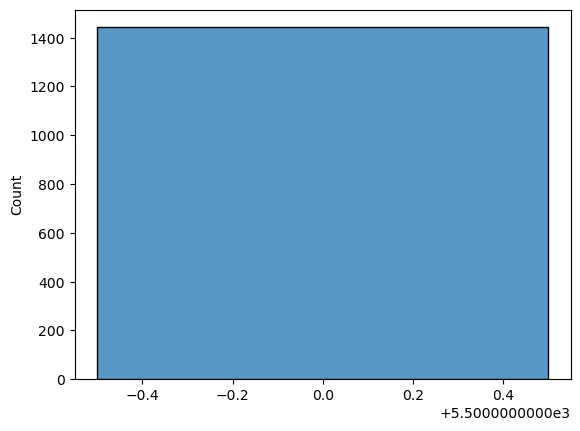

In [51]:
ls = np.array([len(x) for x in dataset.xs])

print(len(ls))

print("min length: ", np.min(ls))
print("max length: ", np.max(ls))
print("mean: ", np.mean(ls))
print("std: ", np.std(ls))

sns.histplot(ls)

idx:  70
Target:  0
Segment length:  5500
window size:  tensor(6400.)
lambda:  tensor(1066.6666)
hop length:  80
total time spectrogram:  0.0014905929565429688
total time Mel spectrogram:  0.003188610076904297
Spectrogram shape:  torch.Size([5501, 69])
Mel spectrogram shape:  torch.Size([128, 69])


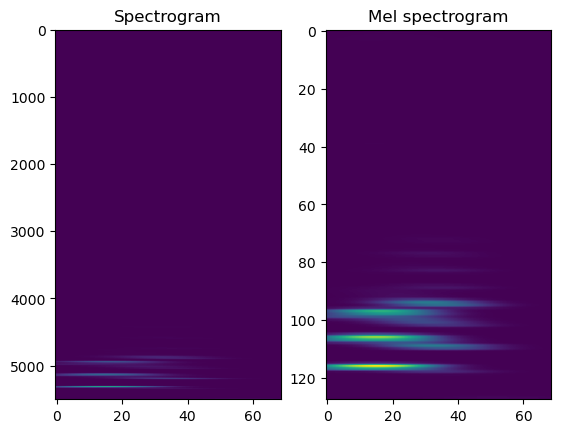

In [55]:
n_mels = 128

idx = np.random.randint(len(dataset))
idx = 70
print("idx: ", idx)
x, y = dataset[idx]

n_points = len(x)


#print("Category: ", dataset.categories[idx])
print("Target: ", y)
print("Segment length: ", len(x))

xt = torch.from_numpy(x)
xt = torch.unsqueeze(xt, dim=0)

window_time = 0.8
lambd = torch.tensor(dataset.sample_rate*window_time) / 6
print("window size: ", lambd*6)
print("lambda: ", lambd)

hop_length = int(dataset.sample_rate * 0.01)
print("hop length: ", hop_length)

normalize_window = True

mel_spectrogram_layer = models.MelSpectrogramLayer(lambd, n_mels, n_points=n_points, 
                                                   sample_rate=dataset.sample_rate,
                                                   f_min=0, f_max=None,
                                                   hop_length=hop_length, device="cpu", optimized=False,
                                                   normalize_window=normalize_window)

spectrogram_layer = models.SpectrogramLayer(lambd, device="cpu", optimized=False, size=(None, None), 
                                            hop_length=hop_length, normalize_window=normalize_window)

# t1 = time.time()
# s1 = spectrogram_layer(xt)
# print("total time: ", t2-t1)
# s1 = s1[0,0]

t1 = time.time()
s2 = spectrogram_layer(xt[:,:n_points])
t2 = time.time()
print("total time spectrogram: ", t2-t1)
s2 = s2[0,0]

t1 = time.time()
mel_s2 = mel_spectrogram_layer(xt[:, :n_points])
t2 = time.time()
print("total time Mel spectrogram: ", t2-t1)
mel_s2 = mel_s2[0, 0]

print("Spectrogram shape: ", s2.shape)
print("Mel spectrogram shape: ", mel_s2.shape)
fig, ax = plt.subplots(1,2)
ax[0].imshow(np.log(np.flip(s2.detach().numpy(), axis=0) + 1), aspect='auto')
ax[0].set_title("Spectrogram")
ax[1].imshow(np.log(np.flip(mel_s2.detach().numpy(), axis=0) + 1), aspect='auto')
ax[1].set_title("Mel spectrogram")
plt.show()
Audio(x, rate=dataset.sample_rate)

In [56]:
mel_s2.sum()

tensor(439.6216, grad_fn=<SumBackward0>)

In [57]:
s2.sum()

tensor(443.6760, grad_fn=<SumBackward0>)

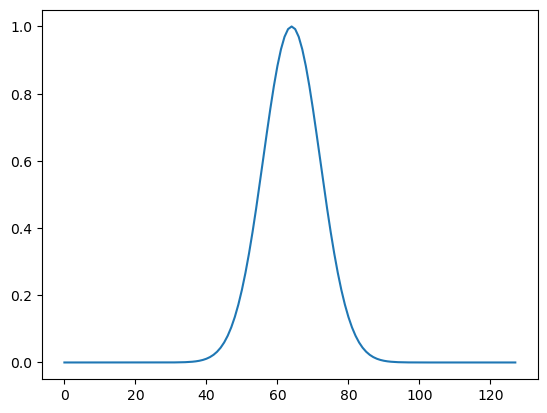

tensor(14.1796)


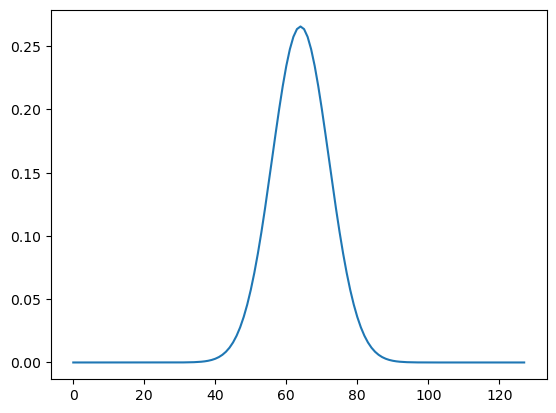

tensor(1.)


In [45]:
lambd = 8
w = tf.differentiable_gaussian_window(lambd, 128, norm=False)
plt.plot(w)
plt.show()
print(torch.sum(torch.pow(w, 2)))

w = tf.differentiable_gaussian_window(lambd, 128, norm=True)
#w = w / torch.sum(torch.sqrt(w))
plt.plot(w)
plt.show()
print(torch.sum(torch.pow(w, 2)))

In [46]:
w = tf.differentiable_gaussian_window(lambd, 128, norm=False)

In [47]:
torch.sum(torch.pow(w, 2))

tensor(14.1796)

In [48]:
torch.sum(torch.pow(w, 2))

tensor(14.1796)